In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
internet = pd.read_csv('dataset\\Internet-Demographic.csv')
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


# 1. Distribution of Birth Rates
### INSIGHT: The histogram shows most countries have birth rates between 10-30 per 1000 people, with fewer at extreme highs or lows.

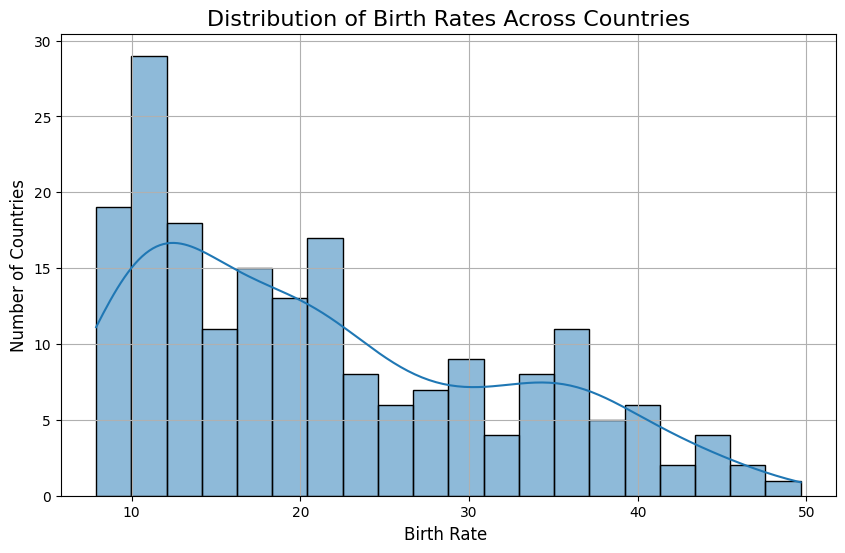

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(data=internet, x='Birth rate', bins=20, kde=True)
plt.title('Distribution of Birth Rates Across Countries', fontsize=16)
plt.xlabel('Birth Rate ', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.grid(True)
plt.show()

# 2. Top 5 Countries with the Highest Internet Usage
### INSIGHT: The bar chart ranks the five nations with the highest internet usage percentages, typically wealthy or tech-advanced.

In [4]:
top_internet = internet.nlargest(5, 'Internet users')[['Country Name', 'Internet users']]
print("\nTop 5 Countries with Highest Internet Usage:")
print(top_internet.to_string(index=False))


Top 5 Countries with Highest Internet Usage:
Country Name  Internet users
     Iceland         96.5468
     Bermuda         95.3000
      Norway         95.0534
      Sweden         94.7836
     Denmark         94.6297


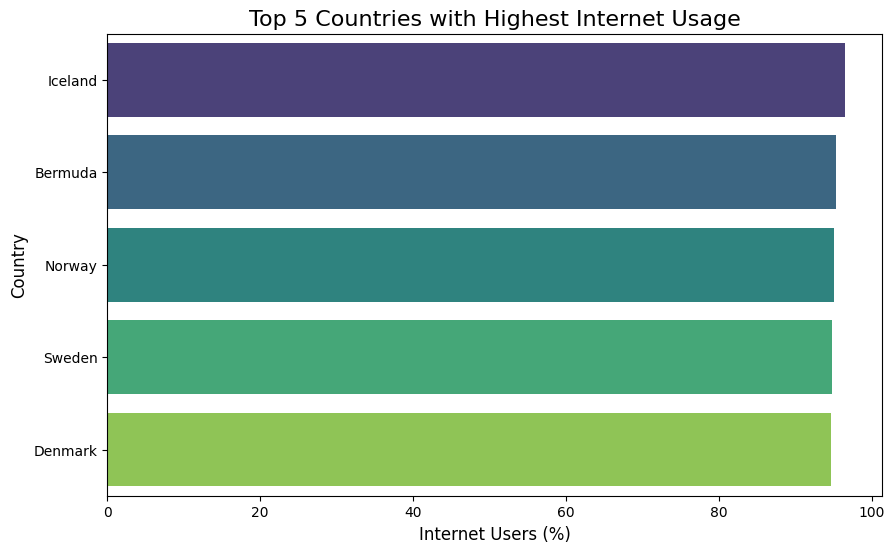

In [5]:
plt.figure(figsize=(10, 6))
top_internet = internet.nlargest(5, 'Internet users')
sns.barplot(data=top_internet, x='Internet users', y='Country Name', palette='viridis')
plt.title('Top 5 Countries with Highest Internet Usage', fontsize=16)
plt.xlabel('Internet Users (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# 3. Count of Countries by Income Group
### INSIGHT: The bar chart counts how many nations fall into each income category (high, middle, low).

In [6]:
income_counts = internet['Income Group'].value_counts()
income_counts

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64

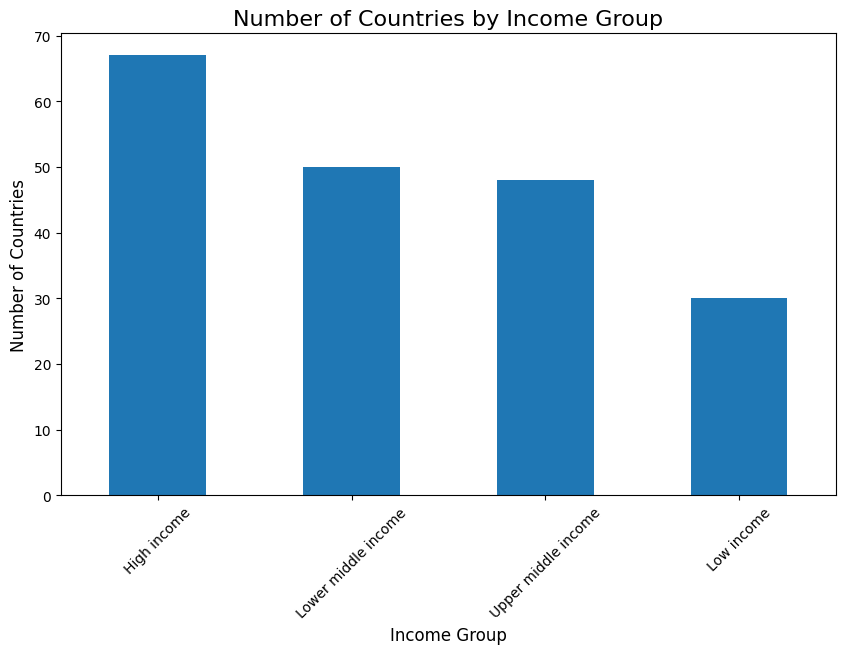

In [7]:
plt.figure(figsize=(10, 6))
income_counts.plot(kind='bar')
plt.title('Number of Countries by Income Group', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 4. Box Plot of Internet Usage (Optional)
### INSIGHT: The boxplot reveals the median, range, and outliers in global internet access rates.

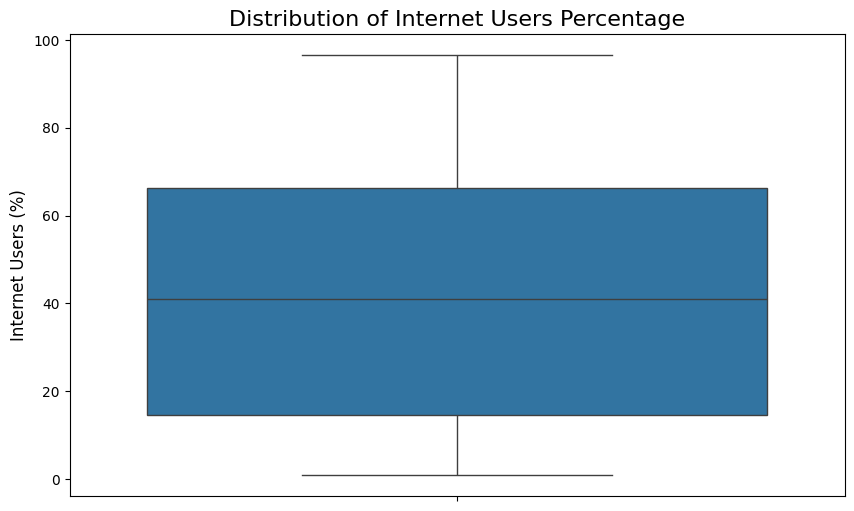

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=internet, y='Internet users')
plt.title('Distribution of Internet Users Percentage', fontsize=16)
plt.ylabel('Internet Users (%)', fontsize=12)
plt.show()

# 5. Countries with No Internet Access
### INSIGHT: The red bars (if any) highlight nations where internet access is completely unavailable.

In [9]:
no_internet = internet[internet['Internet users'] == 0]['Country Name']
print("\nCountries with No Internet Access:")
print(no_internet.to_string(index=False))


Countries with No Internet Access:
Series([], )


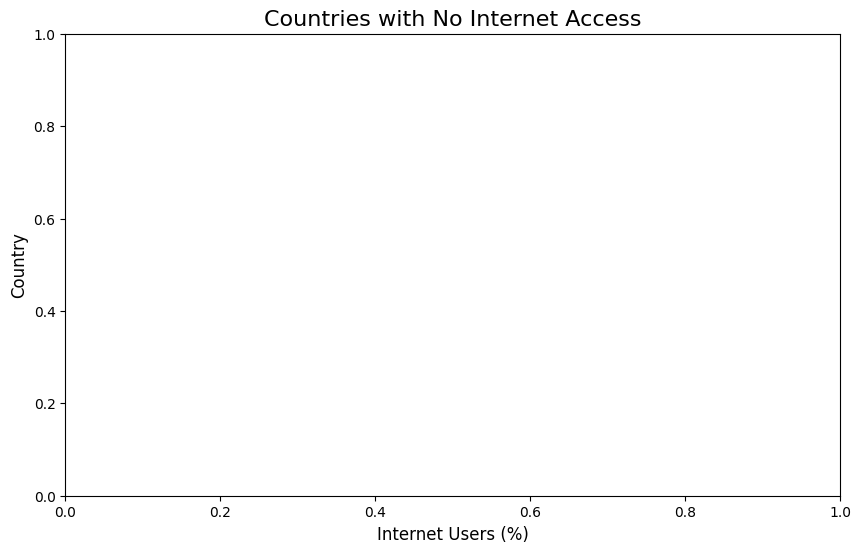

In [10]:
no_internet = internet[internet['Internet users'] == 0]
plt.figure(figsize=(10, 6))
sns.barplot(data=no_internet, x='Internet users', y='Country Name', color='red')
plt.title('Countries with No Internet Access', fontsize=16)
plt.xlabel('Internet Users (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# 6. Average Birth Rate
### INSIGHT: The bar chart proves richer countries average lower birth rates than poorer ones.

In [11]:
avg_birth_rate = internet['Birth rate'].mean()
print(f"\nAverage Birth Rate Across All Countries: {avg_birth_rate:.2f}")


Average Birth Rate Across All Countries: 21.47


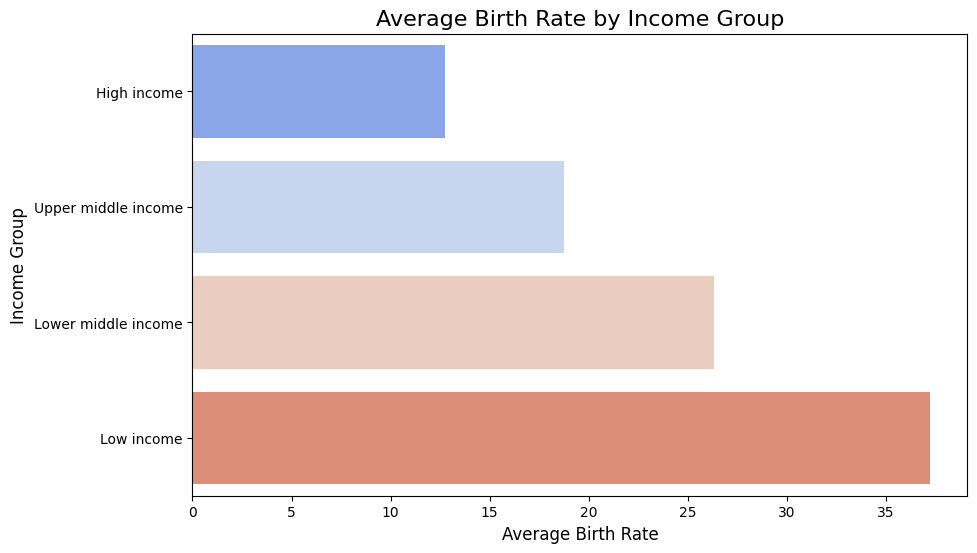

In [12]:
plt.figure(figsize=(10, 6))
avg_birth_by_income = internet.groupby('Income Group')['Birth rate'].mean().sort_values()
sns.barplot(x=avg_birth_by_income.values, y=avg_birth_by_income.index, palette='coolwarm')
plt.title('Average Birth Rate by Income Group', fontsize=16)
plt.xlabel('Average Birth Rate', fontsize=12)
plt.ylabel('Income Group', fontsize=12)
plt.show()

# 7. Scatter Plot: Birth Rate vs. Internet Usage
### INSIGHT: The scatterplot with a downward trend shows nations with more internet users tend to have fewer births.

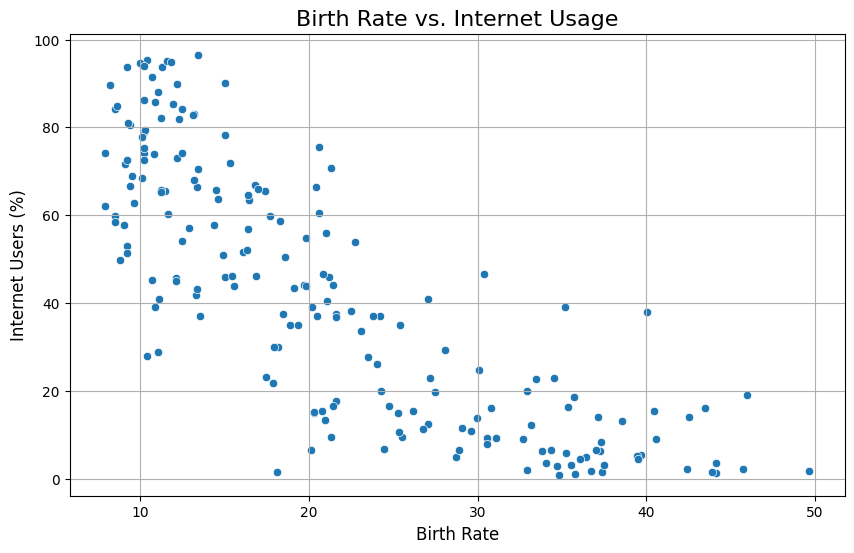

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=internet, x='Birth rate', y='Internet users')
plt.title('Birth Rate vs. Internet Usage', fontsize=16)
plt.xlabel('Birth Rate', fontsize=12)
plt.ylabel('Internet Users (%)', fontsize=12)
plt.grid(True)
plt.show()

# 8. Countries with Birth Rates Above 40
### INSIGHT: The horizontal bars list nations with extremely high birth rates

In [14]:
high_birth = internet[internet['Birth rate'] > 40][['Country Name', 'Birth rate']]
print("\nCountries with Birth Rates Above 40:")
print(high_birth.to_string(index=False))


Countries with Birth Rates Above 40:
    Country Name  Birth rate
          Angola      45.985
         Burundi      44.151
    Burkina Faso      40.551
     Gambia, The      42.525
            Mali      44.138
           Niger      49.661
         Nigeria      40.045
         Somalia      43.891
            Chad      45.745
          Uganda      43.474
Congo, Dem. Rep.      42.394
          Zambia      40.471


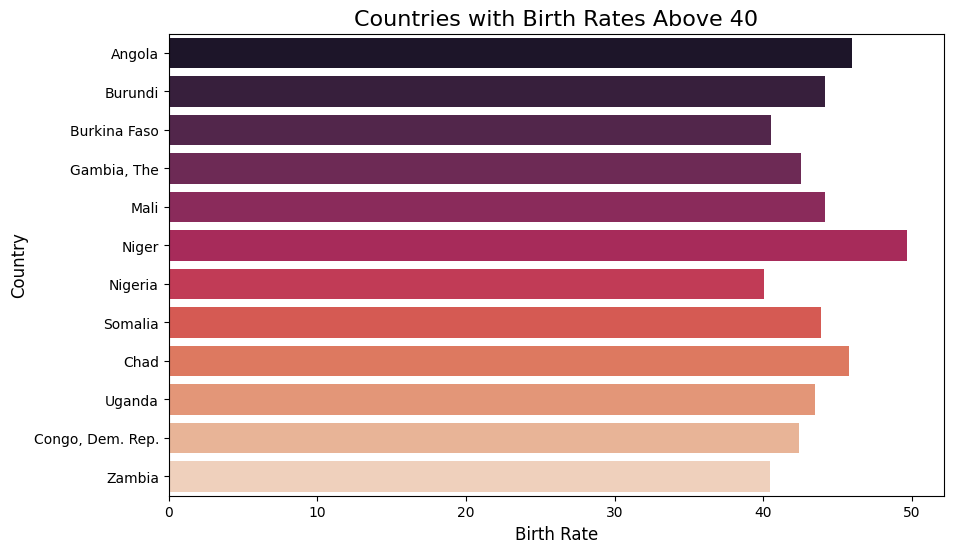

In [15]:
high_birth = internet[internet['Birth rate'] > 40]
plt.figure(figsize=(10, 6))
sns.barplot(data=high_birth, x='Birth rate', y='Country Name', palette='rocket')
plt.title('Countries with Birth Rates Above 40', fontsize=16)
plt.xlabel('Birth Rate', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# 9. Pie Chart of Income Groups
### INSIGHT: The pie chart displays what percentage of countries are rich, middle-income, or poor.

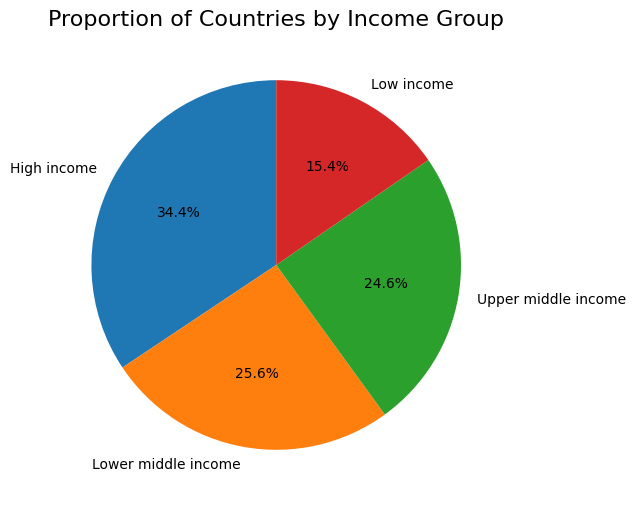

In [16]:
plt.figure(figsize=(10, 6))
income_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Countries by Income Group', fontsize=16)
plt.ylabel('')
plt.show()

# 10. Correlation Between Birth Rate and Internet Usage
### INSIGHT: The correlation value confirms higher internet usage strongly links to lower birth rates. (Strong negative correlation) As one variable increases (either birth rate or internet usage), the other tends to decrease, and vice versa. 

In [17]:
correlation = internet['Birth rate'].corr(internet['Internet users'])
print(f"\nCorrelation between Birth Rate and Internet Usage: {correlation:.2f}")


Correlation between Birth Rate and Internet Usage: -0.82


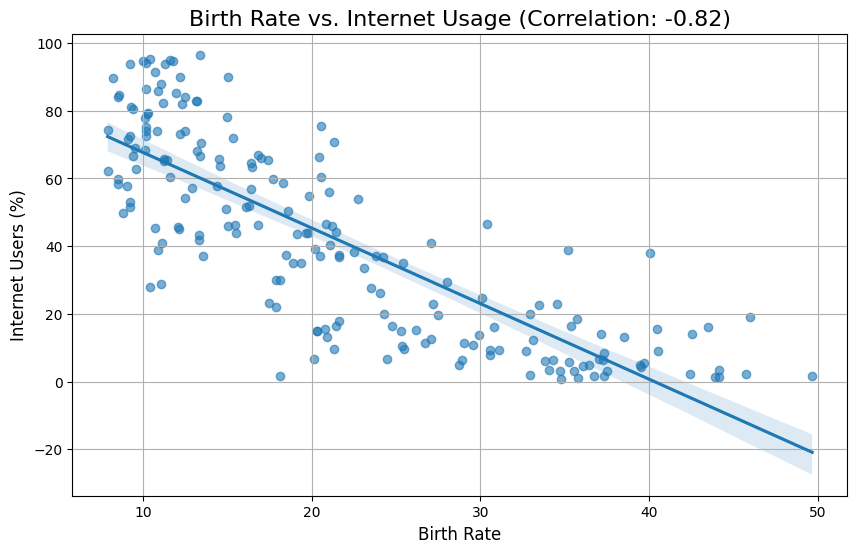

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(data=internet, x='Birth rate', y='Internet users', scatter_kws={'alpha':0.6})
correlation = internet['Birth rate'].corr(internet['Internet users'])
plt.title(f'Birth Rate vs. Internet Usage (Correlation: {correlation:.2f})', fontsize=16)
plt.xlabel('Birth Rate', fontsize=12)
plt.ylabel('Internet Users (%)', fontsize=12)
plt.grid(True)
plt.show()